In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'sakaishunsuke'
os.environ['KAGGLE_KEY'] = '3ae208f5b47b16fc4f59b296428f260e'

import sys
sys.path.append("/home/haselab/projects/sakai/Adversarial-Perception-aware-Perturbation")
import h5py
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import ToTensor

from dataset import PetsDatasetLMDB, PetsDataset, StanfordCarsDatasetLMDB, StanfordCarsDataset, Flowers102Dataset, Flowers102DatasetLMDB,  \
    Caltech101Dataset, Caltech101DatasetLMDB
import matplotlib.pyplot as plt
import numpy as np


In [64]:
# dataset = PetsDatasetLMDB("/home/haselab/projects/sakai/Adversarial-Perception-aware-Perturbation/syn_data/unclip_pets_unclip_s10_n20_x8.hdf5", None, True)
# dataset = StanfordCarsDatasetLMDB("/home/haselab/projects/sakai/Adversarial-Perception-aware-Perturbation/syn_data/unclip_cars_unclip_s10_n20_x8.hdf5", None, "train")
# dataset = Flowers102DatasetLMDB("/home/haselab/projects/sakai/Adversarial-Perception-aware-Perturbation/syn_data/unclip_flowers_unclip_s10_n20_x8.hdf5", None, "train")
dataset = Caltech101DatasetLMDB("/home/haselab/projects/sakai/Adversarial-Perception-aware-Perturbation/syn_data/unclip_caltech_unclip_s10_n20_x1.hdf5", None, "train")

In [65]:
# real_dataset = StanfordCarsDataset("./data/")
# real_dataset = Flowers102Dataset("./data/", None, False)
real_dataset = Caltech101Dataset("./data/", None, False)
# real_dataset = PetsDataset("./data/", None, False)

Number of samples in dataset: 8677


In [66]:
from tqdm import tqdm
real_path_list = []
for i in tqdm(range(len(real_dataset))):
    real_path_list.append(real_dataset[i]["path"])

100%|██████████| 6907/6907 [00:06<00:00, 1035.51it/s]


Reference real sample: 
 Path => ./data/caltech101/101_ObjectCategories/Leopards/image_0123.jpg 
 Label => 2


(-0.5, 127.5, 191.5, -0.5)

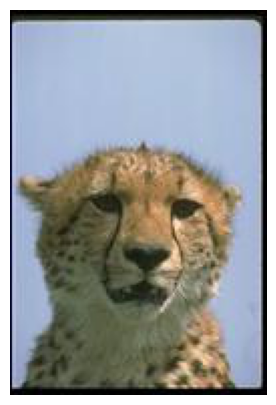

In [67]:
sample_idx = 700
real_sample = real_dataset[sample_idx]
real_img = real_sample["image"]
real_label = real_sample["label"]
real_path = real_sample["path"]

print(f"Reference real sample: \n Path => {real_path} \n Label => {real_label}")
# show w/o grid
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(real_img)
ax.axis("off")

100%|██████████| 6900/6900 [00:00<00:00, 11505.72it/s]


Found 8 synthetic samples with the same path as the reference real sample


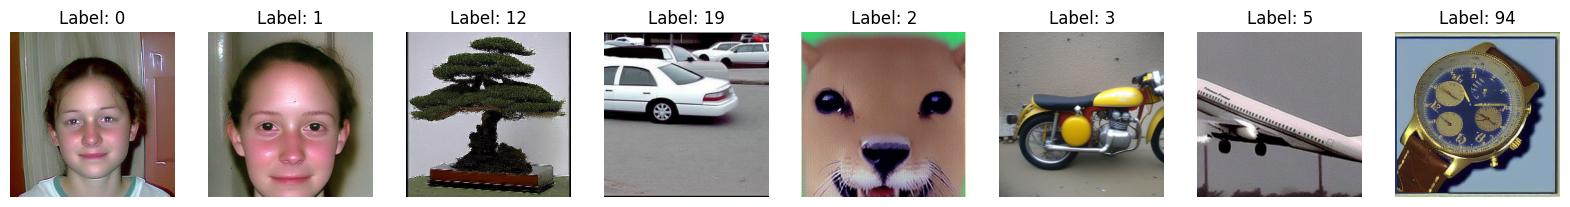

In [68]:
# Retrieve the corresponding synthetic sample
samples = []
for i in tqdm(range(len(dataset))):
    syn_sample = dataset[i]
    syn_path = syn_sample["path"]
    syn_basename = syn_path.split("/")[-1]
    
    real_basename = real_path.split("/")[-1]
    if syn_basename == real_basename:
        samples.append(syn_sample)

print(f"Found {len(samples)} synthetic samples with the same path as the reference real sample")

# Show the synthetic samples
fig, ax = plt.subplots(1, len(samples), figsize=(20, 5))
for i, sample in enumerate(samples):
    ax[i].imshow(sample["image"])
    ax[i].axis("off")
    ax[i].set_title(f"Label: {sample['label']}")


In [32]:
import numpy as np
sample_idx = 0
sample = dataset[sample_idx]
sample_img = sample["image"]
real_path = sample["path"]
print(f"Real path: {real_path}")

for i in range(len(real_path_list)):
    # print(f"Real path list: {real_path_list[i].split('/')[-1]}")
    if real_path_list[i].split("/")[-1] == real_path.split("/")[-1]:
        print(f"Found at index: {i}")
        print(f"Path: {real_path_list[i]}")
        break
assert real_path_list[i].split("/")[-1] == real_path.split("/")[-1], f"Real path: {real_path.split('/')[-1]}, Real path list: {real_path_list[i].split('/')[-1]}"

real_sample = real_dataset[i]
real_sample_img = np.array(real_sample["image"])

img_arr = dataset[sample_idx]["image"]

Real path: data/flowers/jpg/image_06736.jpg
Found at index: 3
Path: ./data/flowers/jpg/image_06736.jpg


In [8]:
print(f"Num of samples: {len(dataset)}")
print(f"Num of real samples: {len(real_dataset)}")

Num of samples: 29440
Num of real samples: 3680


Text(0.5, 1.0, 'Synthetic Image')

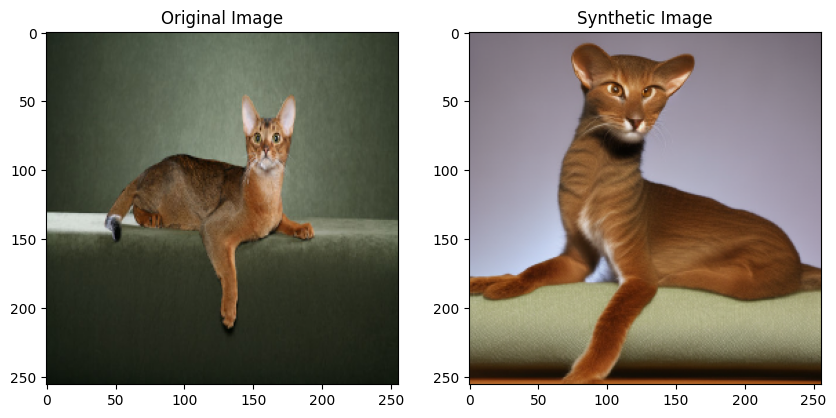

In [9]:
import cv2
real_sample_img = cv2.resize(real_sample_img, sample_img.size)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(real_sample_img)
ax[0].set_title("Original Image")
ax[1].imshow(sample_img)
ax[1].set_title("Synthetic Image")


In [17]:
import diffusers


/home/haselab/anaconda3/envs/diffae/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
